## Esercizi

In [1]:
from utils import readFemResp

resp = readFemResp()

In [22]:
numChild  = resp['numkdhh'].value_counts(normalize=True).sort_index()

In [23]:
numChild

0    0.466178
1    0.214052
2    0.196258
3    0.087139
4    0.025644
5    0.010729
Name: numkdhh, dtype: float64

In [24]:
resp['numkdhh'].mean()

1.024205155043831

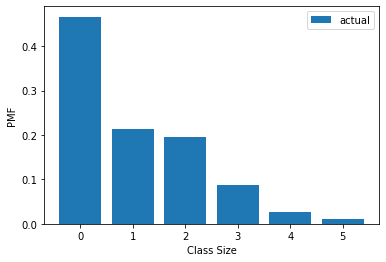

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.bar(numChild.index, numChild.values, label='actual')

ax.set_ylabel('PMF')
ax.set_xlabel('Class Size')


plt.xticks(numChild.index, numChild.index)

ax.legend()

In [28]:
def calcBias(serie):
    biased = serie.copy()
    for index, value in biased.items():
        value = value * index
        biased.loc[index] = value
        
    tot = biased.values.sum()
    biased = biased / tot
    
    return biased
    
    

biased = calcBias(numChild)      

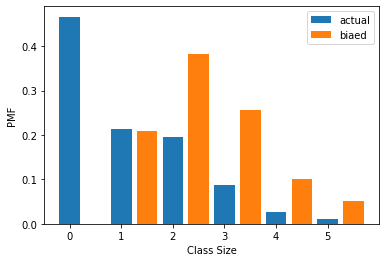

In [30]:
fig, ax = plt.subplots()
width = 0.4
ax.bar(numChild.index, numChild.values, width, label='actual')
ax.bar(biased.index + 0.5, biased.values, width, label='biaed')
ax.set_ylabel('PMF')
ax.set_xlabel('Class Size')


plt.xticks(numChild.index, numChild.index)

ax.legend()

In [32]:
print("mean {0:.2f}".format(sum(p * x for x, p in numChild.items())))

mean 1.02


In [33]:
print("mean {0:.2f}".format(sum(p * x for x, p in biased.items())))

mean 2.40
